In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name
case = 'Aquaplanet'

# /data/darr/COUPLout/800yr
# /data/darr/COUPLout/BADice
# /data/darr/COUPLout/mox
# /data/darr/COUPLout/mox-5C


# path to ocean month file
# path_month = '/data/darr/MOM6_cases/aquaplanet/coupled-xgrid/502yr/05010101.ocean_month.nc'
# dm = xr.open_dataset(path_month, decode_times=True)

# # path to ocean month file
# path_month = '/data/darr/COUPLout/700yr/06000101.ocean_month.nc'
# dm_ocean = xr.open_dataset(path_month, decode_times=True)
# path to ocean month file
path_month = '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.ocean_month.nc'
dm_ocean = xr.open_dataset(path_month, decode_times=True)


# # path to ocean month file
# path_month = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ocean_month.nc'
# dm = xr.open_dataset(path_month, decode_times=True)

# # path to ice month file
# path_month_ice = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ice_month.nc'
# dice = xr.open_dataset(path_month_ice, decode_times=True)

# # path to ice month file
# path_ice = '/data/darr/COUPLout/700yr/06000101.ice_month.nc'
# dice = xr.open_dataset(path_ice, decode_times=True)
# path to ice month file
path_ice = '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.ice_month.nc'
dice = xr.open_dataset(path_ice, decode_times=True)

# # path to atmos month file 
# path_atmos = '/data/darr/COUPLout/700yr/06000101.atmos_month.nc'
# d_atmos = xr.open_dataset(path_atmos, decode_times=True)
# path to atmos month file 
path_atmos = '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.atmos_month.nc'
d_atmos = xr.open_dataset(path_atmos, decode_times=True)

# # path to flux month file
# path_flux = '/data/darr/COUPLout/700yr/06000101.flux_month.nc'
# d_flux = xr.open_dataset(path_flux, decode_times=True)
# path to flux month file
path_flux = '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.flux_month.nc'
d_flux = xr.open_dataset(path_flux, decode_times=True)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


-Is there a steady decrease in globally averaged SST/air temp?

-Or is there a quick shift at some point? (Where the temp plumets rapidly)

	-time series, zonal averages

- Take a look at total ocean heat content (change over time)
- Should be balanced by radiative loss to the atmosphere (energy balance at TOA? Or named something else)

-mixed layer depth

-ocean temperature stratification (zonal mean)

In [2]:
def plot_surface(case, name):
    sst = case['tos'].mean(dim='Time')
    sss = case['sos'].mean(dim='Time')
    ssh = case['ssh'].mean(dim='Time')

    b = np.linspace(-20, 20, 21, endpoint=True)
    t = np.linspace(-20, 20, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sst, b, 
             cmap='magma', extend='both',transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SST.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sst, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[C]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SST_section.png')
    plt.show()

    b_salt = np.linspace(34, 36, 21, endpoint=True)
    t_salt = np.linspace(34, 36, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sss, b_salt, 
             cmap='BrBG_r', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sss, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[psu]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SSS_section.png')
    plt.show()

    b_ssh = np.linspace(-10, 10, 21, endpoint=True)
    t_ssh = np.linspace(-10, 10, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], ssh, b_ssh, 
             cmap='PRGn', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_ssh, boundaries=t_ssh, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[m]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSH'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()
    return


def calculate_global_sfn(vmo, vhGM):
    vmo_slice = (np.nanmean(vmo[-31:-1,:,:,:], axis=0))
    vhGM_slice = (np.nanmean(vhGM[-31:-1,:,:,:], axis=0))
    sfn_global_resmean = (np.cumsum(np.nansum(vmo_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_res = (np.cumsum(np.nansum(vhGM_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_mean = sfn_global_resmean - sfn_global_res
    return sfn_global_mean, sfn_global_res, sfn_global_resmean

def variablename(*arg):
    names = []
    for i in range(len(arg)):
        item = [tpl[0] for tpl in filter(lambda x: arg[i] is x[1], globals().items())]
        names.append(item)
    str(names).strip('[]')
    return names

def plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, y_south, y_north):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    sname = str(names[2]).strip("['']")
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dm_ocean.yq, dm_ocean.zl, sfn_list[row], b, cmap='RdBu_r', extend='both')
        ax.invert_yaxis()
        ax.set_xlim(-np.abs(y_south), y_north)
        plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.savefig(fig_path+'{}_global.png'.format(sname))
    plt.show()
    return


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


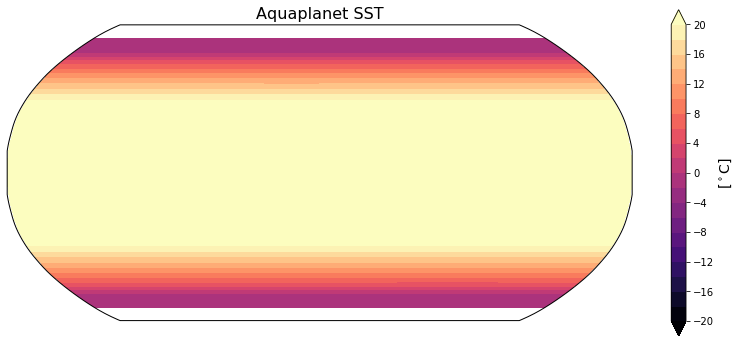

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


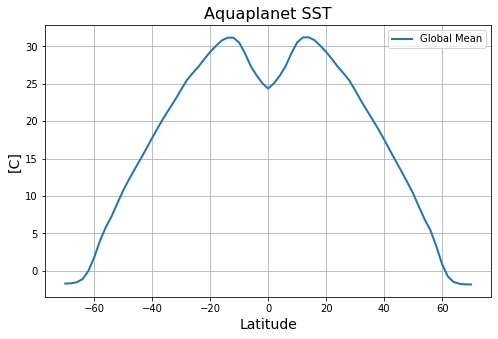

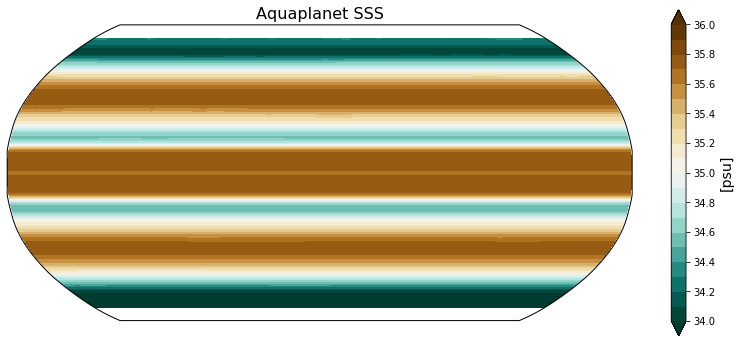

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


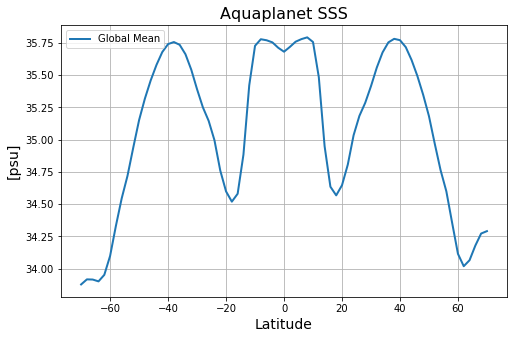

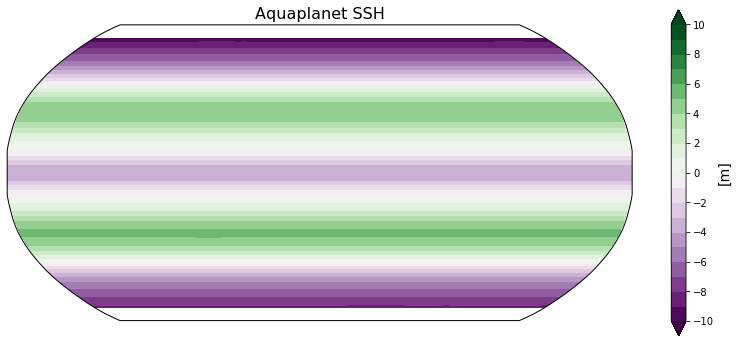

In [3]:
plot_surface(dm_ocean, case)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


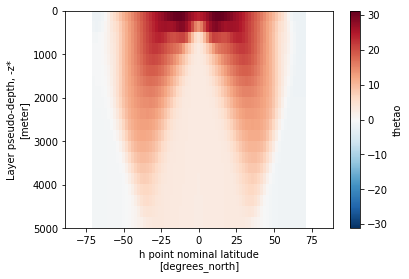

In [4]:
dm_ocean.thetao.mean(dim='xh').mean(dim='Time').plot()
plt.gca().invert_yaxis()

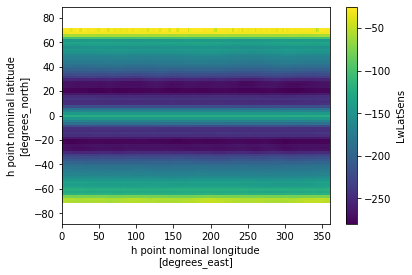

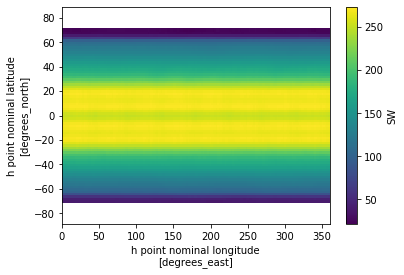

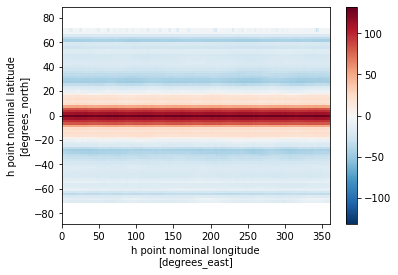

In [5]:
dm_ocean.LwLatSens.mean(dim='Time').plot(); plt.show()
dm_ocean.SW.mean(dim='Time').plot(); plt.show()

(dm_ocean.LwLatSens.mean(dim='Time') + dm_ocean.SW.mean(dim='Time')).plot(); plt.show()

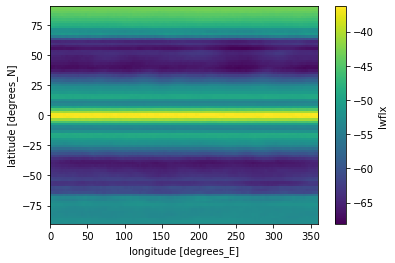

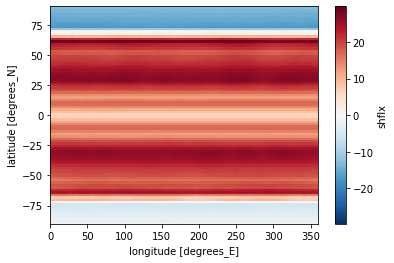

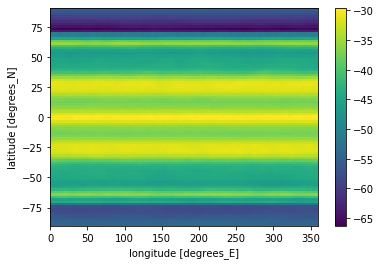

In [6]:
d_flux.lwflx.mean(dim='time').plot(); plt.show()
d_flux.shflx.mean(dim='time').plot(); plt.show()

(d_flux.lwflx.mean(dim='time') + d_flux.shflx.mean(dim='time')).plot(); plt.show()

In [7]:
d_flux.shflx

<xarray.DataArray 'shflx' (time: 600, lat: 90, lon: 144)>
array([[[ 73.79371 ,  73.793175, ...,  73.79446 ,  73.794136],
        [ 73.29648 ,  73.262474, ...,  73.253044,  73.22886 ],
        ...,
        [-26.348312, -26.259445, ..., -26.438559, -26.421892],
        [-23.28639 , -23.285545, ..., -23.28805 , -23.287233]],

       [[ 31.199022,  31.20065 , ...,  31.195627,  31.197342],
        [ 33.74323 ,  33.539635, ...,  34.617382,  34.285206],
        ...,
        [-41.22635 , -41.787815, ..., -41.735813, -40.902477],
        [-41.94226 , -41.940033, ..., -41.946377, -41.944397]],

       ...,

       [[ -4.248891,  -4.249415, ...,  -4.248265,  -4.248498],
        [ -4.994571,  -4.890003, ...,  -5.291422,  -5.166864],
        ...,
        [-28.77581 , -29.110905, ..., -27.948006, -28.365461],
        [-27.702879, -27.703985, ..., -27.700945, -27.701855]],

       [[ 34.239754,  34.23903 , ...,  34.237118,  34.23906 ],
        [ 26.138636,  25.754261, ...,  26.173302,  26.297232],
        ...,
        [-15.737808, -15.676846, ..., -15.965776, -15.823891],
        [-13.52911 , -13.529021, ..., -13.529079, -13.52913 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * time     (time) object 0451-01-16 12:00:00 ... 0500-12-16 12:00:00
Attributes:
    long_name:      sensible heat flux
    units:          w/m2
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [13]:
# time series global mean sea surface temp

# # path to ocean_month file
# paths = ('/data/darr/COUPLout/500yr/04990101.ocean_month.nc',
#         '/data/darr/COUPLout/510yr/05000101.ocean_month.nc',
#         '/data/darr/COUPLout/550yr/05100101.ocean_month.nc',
#         '/data/darr/COUPLout/600yr/05500101.ocean_month.nc',
#         '/data/darr/COUPLout/700yr/06000101.ocean_month.nc',
#         '/data/darr/COUPLout/800yr/07000101.ocean_month.nc')

# paths = ('/data/darr/COUPLout/mox/650yr-mox/06000101.ocean_month.nc',
#         '/data/darr/COUPLout/mox/700yr-mox/06500101.ocean_month.nc',
#         '/data/darr/COUPLout/mox/750yr-mox/07000101.ocean_month.nc')

# paths = ('/data/darr/COUPLout/mox-5C/0050yr-5C/00010101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0100yr-5C/00510101.ocean_month.nc',
#         '/data/darr/COUPLout/mox-5C/0140yr-5C/01010101.ocean_month.nc')


paths = ('/data/darr/COUPLout/solarmox/sol16/0050sol16/00010101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0100sol16/00510101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0150sol16/01010101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0250sol16/01510101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0300sol16/02510101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0350sol16/03010101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0400sol16/03510101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0450sol16/04010101.ocean_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.ocean_month.nc')

ds_ocean = xr.open_mfdataset(paths, combine='by_coords')
# #                           concat_dim='time', decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Text(0.5, 1.0, 'Global Mean SST Timeseries')

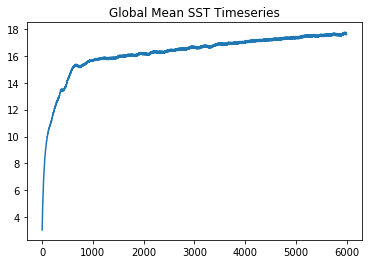

In [14]:
plt.plot(ds_ocean.tos.mean(dim='yh').mean(dim='xh'))
plt.title('Global Mean SST Timeseries')

In [15]:
# time series global mean near surface air temp

# path to ocean_month file
# paths = ('/data/darr/COUPLout/500yr/04990101.flux_month.nc',
#         '/data/darr/COUPLout/510yr/05000101.flux_month.nc',
#         '/data/darr/COUPLout/550yr/05100101.flux_month.nc',
#         '/data/darr/COUPLout/600yr/05500101.flux_month.nc',
#         '/data/darr/COUPLout/700yr/06000101.flux_month.nc')

# paths = ('/data/darr/COUPLout/mox/650yr-mox/06000101.flux_month.nc',
#         '/data/darr/COUPLout/mox/700yr-mox/06500101.flux_month.nc',
#         '/data/darr/COUPLout/mox/750yr-mox/07000101.flux_month.nc')

# paths = ('/data/darr/COUPLout/mox-5C/0050yr-5C/00010101.flux_month.nc',
#          '/data/darr/COUPLout/mox-5C/0100yr-5C/00510101.flux_month.nc',
#         '/data/darr/COUPLout/mox-5C/0140yr-5C/01010101.flux_month.nc',
#         '/data/darr/COUPLout/mox-5C/0150yr-5C/01410101.flux_month.nc',
#         '/data/darr/COUPLout/mox-5C/0200yr-5C/01510101.flux_month.nc',
#         '/data/darr/COUPLout/mox-5C/0250yr-5C/02010101.flux_month.nc',
#         '/data/darr/COUPLout/mox-5C/0300yr-5C/02510101.flux_month.nc',
#          '/data/darr/COUPLout/mox-5C/0350yr-5C/03010101.flux_month.nc')

paths = ('/data/darr/COUPLout/solarmox/sol16/0050sol16/00010101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0100sol16/00510101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0150sol16/01010101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0250sol16/01510101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0300sol16/02510101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0350sol16/03010101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0400sol16/03510101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0450sol16/04010101.flux_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.flux_month.nc',)

ds_flux = xr.open_mfdataset(paths, combine='by_coords')
#                           concat_dim='time', decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


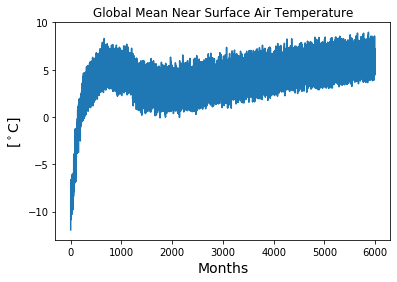

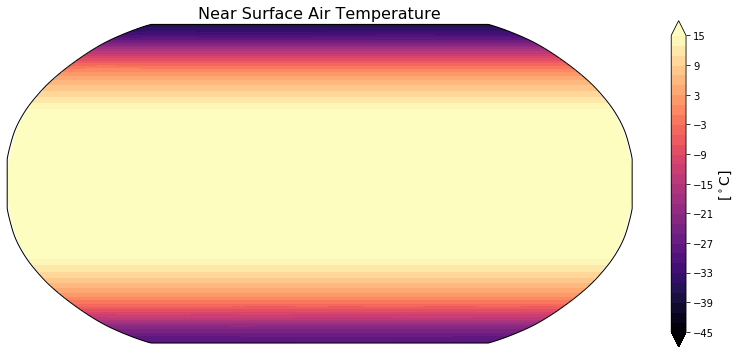

In [16]:
plt.plot(ds_flux.t_atm.mean(dim='lat').mean(dim='lon')-273.15)
plt.title('Global Mean Near Surface Air Temperature')
plt.ylabel('[$^\circ$C]', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.show()

b = np.linspace(-45, 15, 31, endpoint=True)
t = np.linspace(-45, 15, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, ds_flux.t_atm.mean(dim='time')-273.15, b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Near Surface Air Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()


# plt.plot(d_flux.t_surf.mean(dim='lat').mean(dim='lon'))
# plt.title('Global Mean Surface Air Temperature')

In [17]:
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean, sfn_res, sfn_resmean = calculate_global_sfn(dm_ocean.vmo, dm_ocean.vhGM)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice


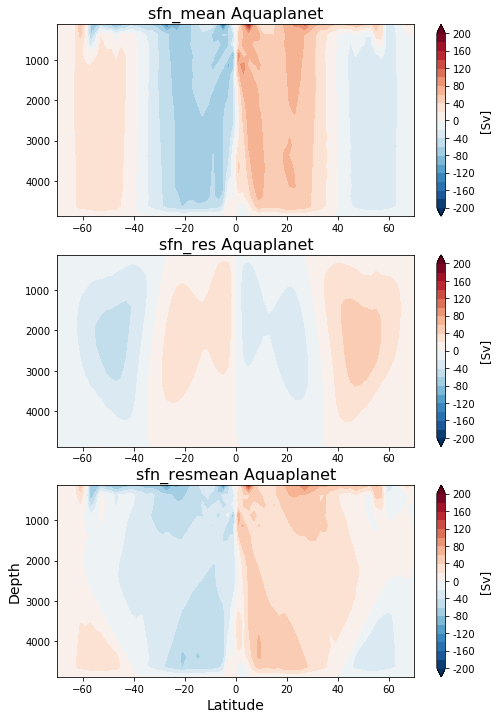

In [18]:
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, 200, -70, 70)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


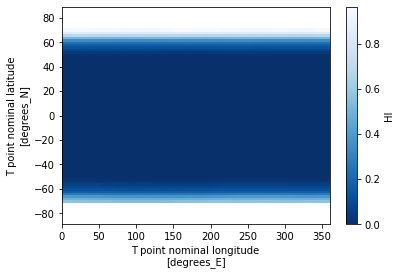

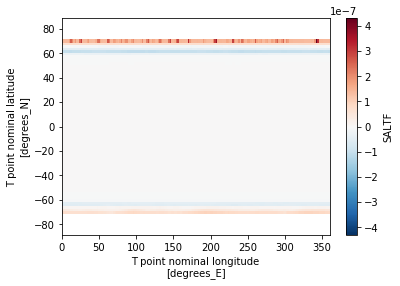

In [19]:
dice.HI.mean(dim='time').plot(cmap='Blues_r'); plt.show()

dice.SALTF.mean(dim='time').plot(); plt.show()

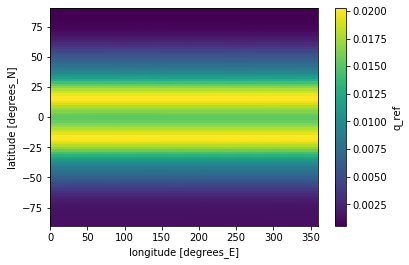

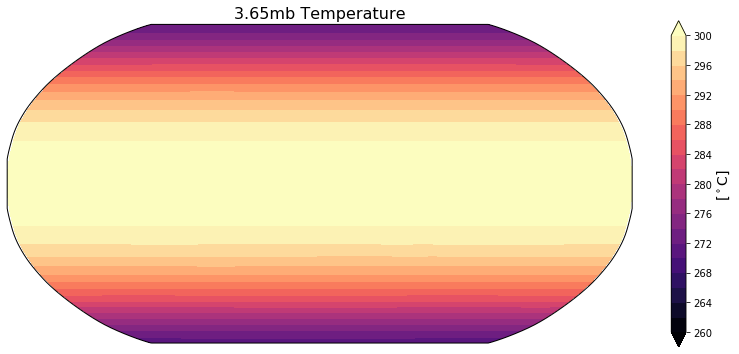

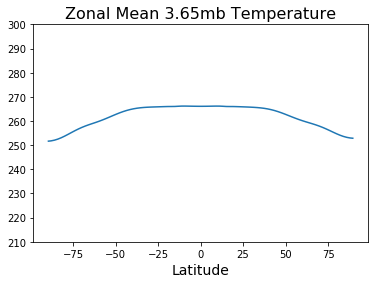

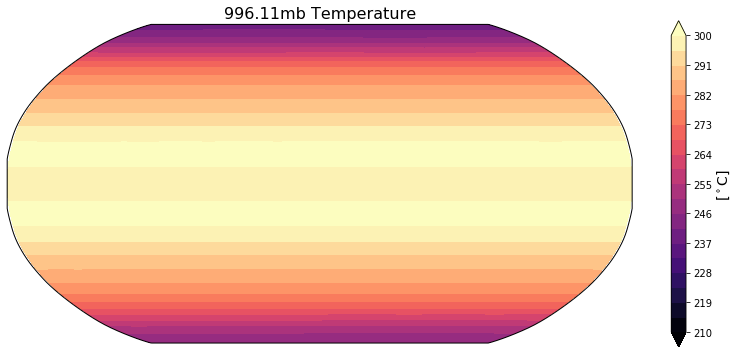

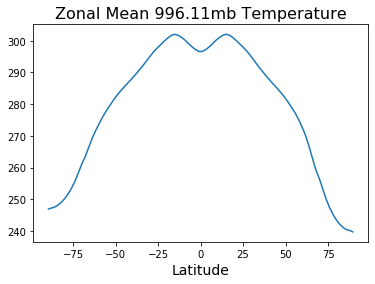

In [20]:
d_atmos.q_ref.mean(dim='time').plot(); plt.show()

b = np.linspace(260, 300, 21, endpoint=True)
t = np.linspace(260, 300, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=0).mean(dim='time'), b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('3.65mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=1).mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean 3.65mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylim([210,300])
plt.show()

b = np.linspace(210, 300, 21, endpoint=True)
t = np.linspace(210, 300, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time'), b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('996.11mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean 996.11mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([210,300])
plt.show()

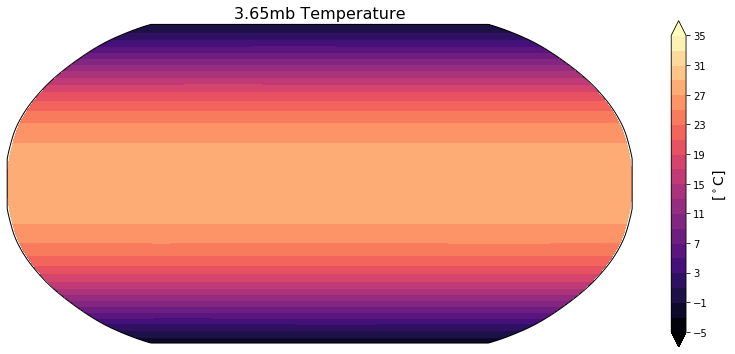

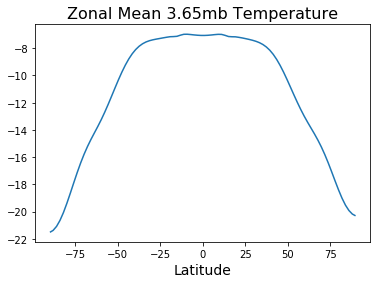

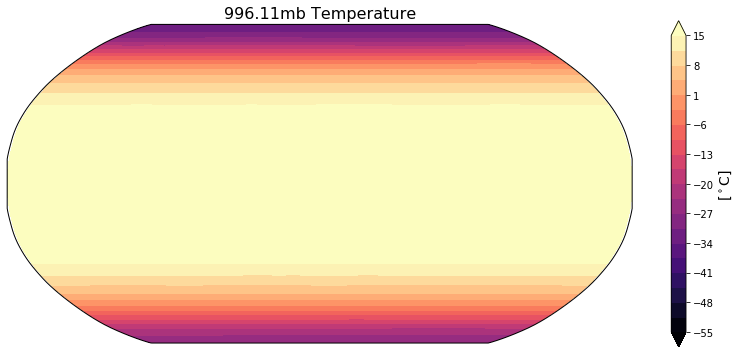

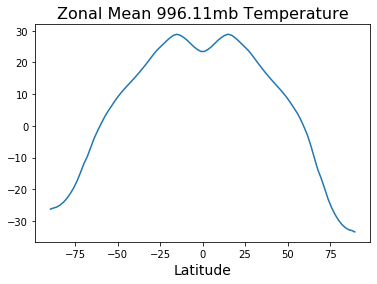

In [21]:
b = np.linspace(-5, 35, 21, endpoint=True)
t = np.linspace(-5, 35, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=0).mean(dim='time')-273.15, b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('3.65mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=1).mean(dim='time').mean(dim='lon')-273.15)
plt.title('Zonal Mean 3.65mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([-60,30])
plt.show()

b = np.linspace(-55, 15, 21, endpoint=True)
t = np.linspace(-55, 15, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_atmos.lon, d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time')-273.15, b, 
         cmap='magma', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('996.11mb Temperature', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_atmos.lat, d_atmos.temp.isel(pfull=-1).mean(dim='time').mean(dim='lon')-273.15)
plt.title('Zonal Mean 996.11mb Temperature', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([-70,30])
plt.show()

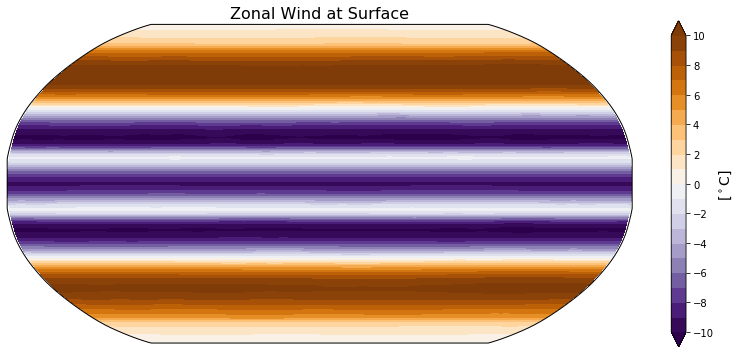

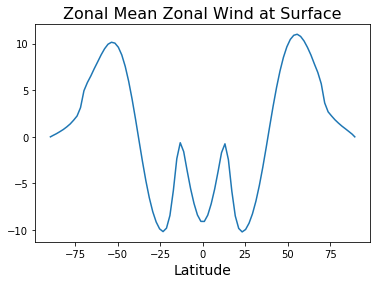

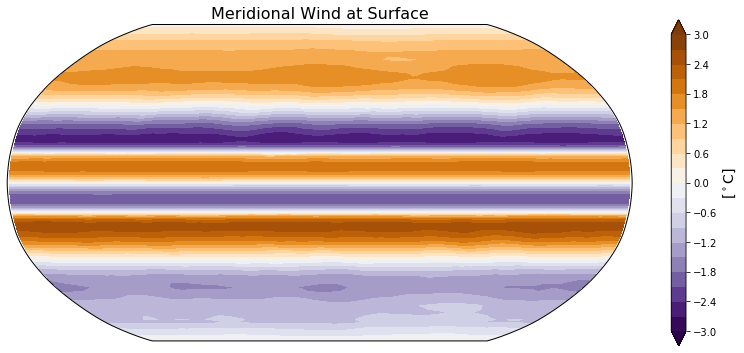

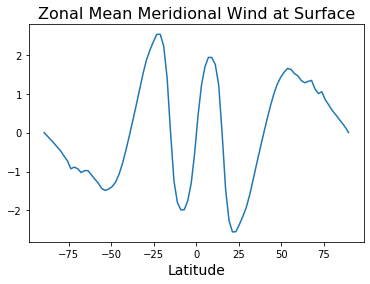

In [22]:
b = np.linspace(-10, 10, 21, endpoint=True)
t = np.linspace(-10, 10, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_flux.lon, d_flux.lat, d_flux.u_atm.mean(dim='time'), b, 
         cmap='PuOr_r', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Zonal Wind at Surface', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_flux.lat, d_flux.u_atm.mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean Zonal Wind at Surface', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([210,300])
plt.show()


b = np.linspace(-3, 3, 21, endpoint=True)
t = np.linspace(-3, 3, 11, endpoint=True)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(d_flux.lon, d_flux.lat, d_flux.v_atm.mean(dim='time'), b, 
         cmap='PuOr_r', extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('Meridional Wind at Surface', fontsize=16)
# plt.savefig(fig_path+'SST.png')
plt.show()

fig = plt.figure()
plt.plot(d_flux.lat, d_flux.v_atm.mean(dim='time').mean(dim='lon'))
plt.title('Zonal Mean Meridional Wind at Surface', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
# plt.ylim([210,300])
plt.show()

In [ ]:
area_a = xr.zeros_like(ds_atmos.netrad_toa.isel(time=-1))

dlon = np.deg2rad(2.5)
dlat = np.deg2rad(2.5)

y_dist = dlat*111000 * np.cos(np.deg2rad(area_a.lat))
Y_dist = np.tile(y_dist, (144,1)).T

x_dist = xr.zeros_like(area_a.lon) + dlon*111000
X_dist = np.tile(x_dist, (90,1))

area = X_dist*Y_dist
area_a.values = area


area_o = xr.zeros_like(ds_ocean.tos.isel(Time=-1))

dlon = np.deg2rad(2)
dlat = np.deg2rad(2)

y_dist = 2*111000 * np.cos(np.deg2rad(area_o.yh))
y_dist[0:10] = xr.zeros_like(y_dist.sel(yh=slice(-89,-69)))
y_dist[79:89] = xr.zeros_like(y_dist.sel(yh=slice(69,89)))
Y_dist = np.tile(y_dist, (180,1)).T

x_dist = xr.zeros_like(area_o.xh) + 2*111000
X_dist = np.tile(x_dist, (89,1))

area = X_dist*Y_dist
area_o.values = area


In [33]:
# paths = ('/data/darr/COUPLout/mox-5C/0050yr-5C/00010101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0100yr-5C/00510101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0140yr-5C/01010101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0150yr-5C/01410101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0200yr-5C/01510101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0250yr-5C/02010101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0300yr-5C/02510101.ocean_month.nc',
#          '/data/darr/COUPLout/mox-5C/0350yr-5C/03010101.ocean_month.nc')

# paths = ('/data/darr/COUPLout/nmox/0025yr/00010101.ocean_month.nc',
#          '/data/darr/COUPLout/nmox/0050yr/00260101.ocean_month.nc',
#          '/data/darr/COUPLout/nmox/0100yr/00510101.ocean_month.nc',
#          '/data/darr/COUPLout/nmox/0150yr/01010101.ocean_month.nc',)

# ds_ocean = xr.open_mfdataset(paths, combine='by_coords')
#                           concat_dim='time', decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


Heat_content = T(i,j,k) * h(i,j,k) * heat_capacity

Heat_flux_out_of_ocean = (heat_content(t=1) - heat_content(t=0))/((delta_T*area_of_ocean))

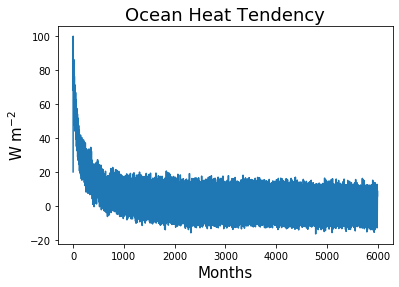

2.5136283937744763


In [113]:
heat_content = ((ds_ocean.Th_tendency_2d*area_o).sum(dim='xh').sum(dim='yh'))/area_o.sum(dim='xh').sum(dim='yh')

plt.plot(heat_content)
plt.title('Ocean Heat Tendency', fontsize=18) 
plt.ylabel('W m$^{-2}$', fontsize=15); plt.xlabel('Months', fontsize=15)
plt.show()

# plt.plot(ds_ocean.Th_tendency_2d.sum(dim='xh').sum(dim='yh')/area); plt.show()

print(heat_content.isel(Time=slice(-101,-1)).mean(dim='Time').values)


In [25]:
paths = ('/data/darr/COUPLout/solarmox/sol16/0050sol16/00010101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0100sol16/00510101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0150sol16/01010101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0250sol16/01510101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0300sol16/02510101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0350sol16/03010101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0400sol16/03510101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0450sol16/04010101.atmos_month.nc',
         '/data/darr/COUPLout/solarmox/sol16/0500sol16/04510101.atmos_month.nc',)

ds_atmos = xr.open_mfdataset(paths, combine='by_coords')
#                           concat_dim='time', decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


4.19609031618931


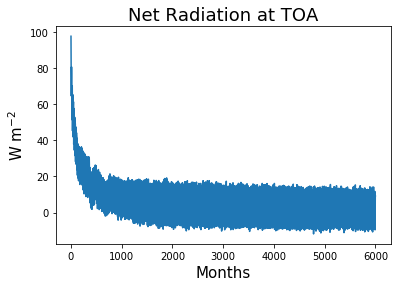

In [115]:
netrad_toa = ((ds_atmos.netrad_toa*area_a).sum(dim='lon').sum(dim='lat'))/area_a.sum('lat').sum('lon')

plt.plot(netrad_toa)
plt.title('Net Radiation at TOA', fontsize=18) 
plt.ylabel('W m$^{-2}$', fontsize=15); plt.xlabel('Months', fontsize=15)
plt.plot()

print(netrad_toa.isel(time=slice(-101,-1)).mean(dim='time').values)


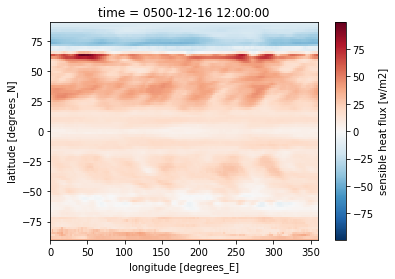

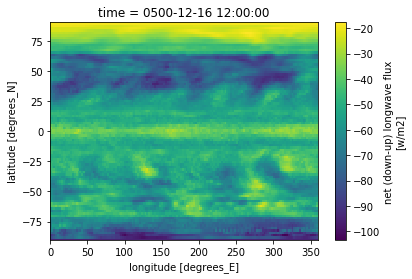

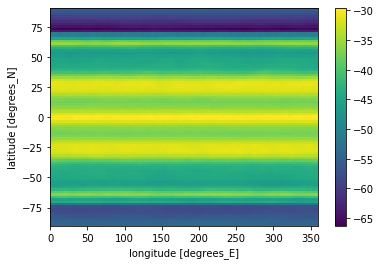

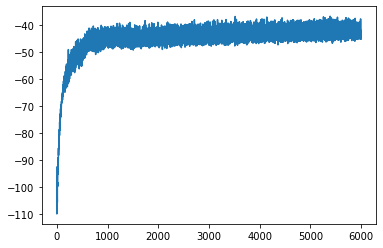

In [27]:
d_flux.shflx.isel(time=-1).plot(); plt.show()
d_flux.lwflx.isel(time=-1).plot(); plt.show()

(d_flux.shflx.mean(dim='time')+d_flux.lwflx.mean(dim='time')).plot(); plt.show()

plt.plot(ds_flux.shflx.mean(dim='lat').mean(dim='lon')+ds_flux.lwflx.mean(dim='lat').mean(dim='lon')); plt.show()